In [88]:
#Dependencies

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [89]:
train = pd.read_csv('pipelined_train.csv')
test = pd.read_csv('pipelined_test.csv')

train.head()

,Unnamed: 0,first_active_month,card_id,feature_3,target,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,...,authorized_flag_sum,authorized_flag_mean,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3
0,0,6/1/17,C_ID_92a2005557,1,-0.820283,245,13.0,0.0,0.000000,1.000000,...,247,0.950000,0,0,0,0,1,0,1,0
1,1,1/1/17,C_ID_3d0044924f,0,0.392913,396,11.0,2.0,0.181818,0.818182,...,339,0.968571,0,0,0,1,0,1,0,0
2,2,8/1/16,C_ID_d639edf6cd,0,0.688056,549,2.0,0.0,0.000000,0.000000,...,41,0.953488,0,1,0,0,0,0,1,0
3,3,9/1/17,C_ID_186d6a6901,0,0.142495,153,NaN,NaN,NaN,NaN,...,77,1.000000,0,0,0,1,0,0,0,1
4,4,11/1/17,C_ID_cdbd2c0db2,0,-0.159749,92,5.0,3.0,0.600000,0.000000,...,128,0.962406,1,0,0,0,0,0,0,1


In [90]:
train_c = train.dropna()
test_c = test.dropna()
train_c

,Unnamed: 0,first_active_month,card_id,feature_3,target,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,...,authorized_flag_sum,authorized_flag_mean,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3
0,0,6/1/17,C_ID_92a2005557,1,-0.820283,245,13.0,0.0,0.000000,1.000000,...,247,0.950000,0,0,0,0,1,0,1,0
1,1,1/1/17,C_ID_3d0044924f,0,0.392913,396,11.0,2.0,0.181818,0.818182,...,339,0.968571,0,0,0,1,0,1,0,0
4,4,11/1/17,C_ID_cdbd2c0db2,0,-0.159749,92,5.0,3.0,0.600000,0.000000,...,128,0.962406,1,0,0,0,0,0,0,1
6,6,12/1/16,C_ID_7e63323c00,1,0.230129,427,17.0,0.0,0.000000,0.000000,...,243,0.934615,0,0,1,0,0,0,1,0
9,9,8/1/16,C_ID_bf62c0b49d,0,0.300062,549,14.0,0.0,0.000000,1.000000,...,99,0.876106,0,1,0,0,0,0,1,0
14,14,8/1/17,C_ID_b6302b31c6,1,1.597750,184,7.0,0.0,0.000000,0.428571,...,58,0.892308,0,0,1,0,0,0,1,0
16,16,7/1/16,C_ID_9feec11e78,0,1.132236,580,33.0,17.0,0.515152,0.090909,...,82,0.713043,0,1,0,0,0,0,1,0
20,20,9/1/17,C_ID_0b70ca7347,1,1.442726,153,15.0,0.0,0.000000,0.866667,...,165,0.916667,0,0,0,0,1,0,1,0
23,23,10/1/17,C_ID_e03db05bde,0,-0.529658,123,9.0,0.0,0.000000,0.000000,...,123,0.931818,0,1,0,0,0,0,1,0
24,24,10/1/15,C_ID_dcb7c76747,1,-0.084951,854,12.0,0.0,0.000000,1.000000,...,154,0.927711,0,0,0,0,1,1,0,0


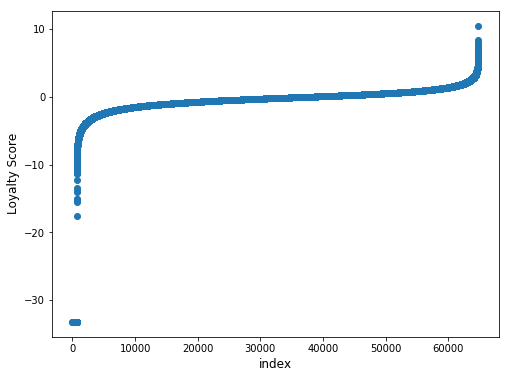

In [91]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(train_c.shape[0]), np.sort(train_c[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.savefig('loyaltyscore')
plt.show()


In [92]:
#data.dtypes
headers = train_c.dtypes.index
headers

Index(['Unnamed: 0', 'first_active_month', 'card_id', 'feature_3', 'target',
       'elapsed_time', 'hist_transactions_count', 'hist_category_1_sum',
       'hist_category_1_mean', 'hist_category_2_1.0_mean',
       ...
       'authorized_flag_sum', 'authorized_flag_mean', 'feature_1_1',
       'feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5',
       'feature_2_1', 'feature_2_2', 'feature_2_3'],
      dtype='object', length=147)

In [93]:
#list(data.columns.values)
list(train_c)

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_3',
 'target',
 'elapsed_time',
 'hist_transactions_count',
 'hist_category_1_sum',
 'hist_category_1_mean',
 'hist_category_2_1.0_mean',
 'hist_category_2_2.0_mean',
 'hist_category_2_3.0_mean',
 'hist_category_2_4.0_mean',
 'hist_category_2_5.0_mean',
 'hist_category_3_A_mean',
 'hist_category_3_B_mean',
 'hist_category_3_C_mean',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_state_id_nunique',
 'hist_city_id_nunique',
 'hist_subsector_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_std',
 'hist_installments_sum',
 'hist_installments_mean',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_std',
 'hist_purchase_month_mean',
 'hist_purchase_month_max',
 'hist_purchase_month_min',
 'hist_purchase_month_std',
 'hist_purchase_date_ptp',
 'hist_purchase_date_min',
 'hist_purcha

In [94]:
#list(data.columns.values)
list(test_c)

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_3',
 'elapsed_time',
 'hist_transactions_count',
 'hist_category_1_sum',
 'hist_category_1_mean',
 'hist_category_2_1.0_mean',
 'hist_category_2_2.0_mean',
 'hist_category_2_3.0_mean',
 'hist_category_2_4.0_mean',
 'hist_category_2_5.0_mean',
 'hist_category_3_A_mean',
 'hist_category_3_B_mean',
 'hist_category_3_C_mean',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_state_id_nunique',
 'hist_city_id_nunique',
 'hist_subsector_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_std',
 'hist_installments_sum',
 'hist_installments_mean',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_std',
 'hist_purchase_month_mean',
 'hist_purchase_month_max',
 'hist_purchase_month_min',
 'hist_purchase_month_std',
 'hist_purchase_date_ptp',
 'hist_purchase_date_min',
 'hist_purchase_date_max

In [95]:
#Create a new dataframe to check simple correlations
train_c_1 = train_c[['feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5', 'feature_2_2', 'feature_2_3', 'feature_3', 'hist_transactions_count', 'hist_category_1_mean', 'hist_category_2_2.0_mean', 'hist_category_2_3.0_mean', 'hist_category_2_4.0_mean', 'hist_category_2_5.0_mean', 'hist_category_3_B_mean', 'hist_category_3_C_mean', 'hist_purchase_amount_mean', 'hist_installments_mean', 'hist_purchase_month_mean', 'hist_purchase_date_ptp', 'auth_transactions_count']]

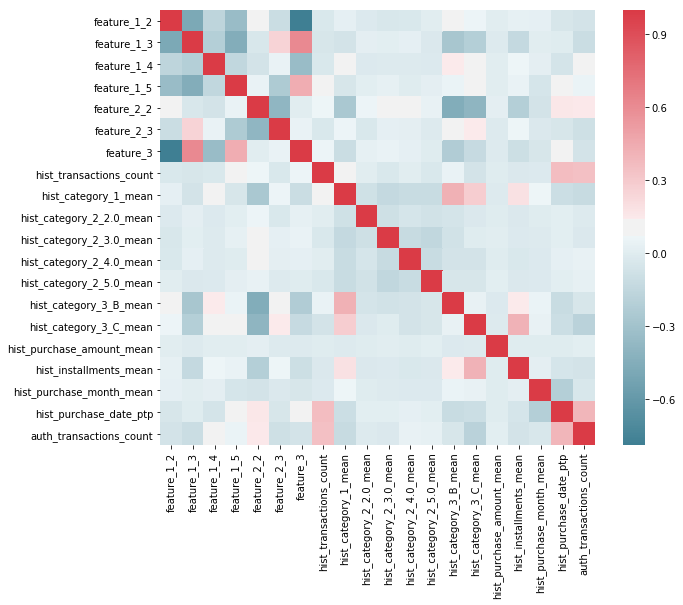

In [96]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train_c_1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [97]:
#try correlation matrix for all the variables
#plt.matshow(train_c.corr())
corr_df = train_c.corr()
corr_df

,Unnamed: 0,feature_3,target,elapsed_time,hist_transactions_count,hist_category_1_sum,hist_category_1_mean,hist_category_2_1.0_mean,hist_category_2_2.0_mean,hist_category_2_3.0_mean,...,authorized_flag_sum,authorized_flag_mean,feature_1_1,feature_1_2,feature_1_3,feature_1_4,feature_1_5,feature_2_1,feature_2_2,feature_2_3
Unnamed: 0,1.000000,0.005710,-0.004397,0.007901,0.008556,-0.001791,-0.008072,0.002151,0.000823,0.004720,...,0.004045,-0.004662,-0.000873,-0.002408,0.002030,-0.006148,0.004152,-0.002565,0.004387,-0.002588
feature_3,0.005710,1.000000,-0.006494,0.136924,0.059163,-0.046214,-0.106496,0.008213,0.030242,0.045343,...,-0.061582,-0.066972,-0.256396,-0.787121,0.611123,-0.343470,0.436729,-0.036758,0.002263,0.046783
target,-0.004397,-0.006494,1.000000,-0.046106,-0.033210,-0.047525,-0.044662,0.006781,-0.002887,0.020288,...,0.031686,0.056317,0.004259,0.002930,-0.004265,0.004138,-0.002499,-0.007286,0.025820,-0.025841
elapsed_time,0.007901,0.136924,-0.046106,1.000000,0.111810,0.016670,-0.067240,0.036588,0.007601,0.000681,...,0.147536,0.077572,-0.076822,-0.074819,0.063657,-0.073917,0.082552,-0.038053,-0.067935,0.145694
hist_transactions_count,0.008556,0.059163,-0.033210,0.111810,1.000000,0.582835,0.141262,-0.054451,0.008591,-0.027931,...,0.344403,-0.294432,-0.045159,-0.028799,-0.041064,-0.029053,0.113600,-0.043369,0.065748,-0.032102
hist_category_1_sum,-0.001791,-0.046214,-0.047525,0.016670,0.582835,1.000000,0.612861,-0.207417,-0.045192,-0.083824,...,-0.025380,-0.358626,0.031766,0.016287,-0.041862,0.036500,-0.004704,0.125209,-0.155850,0.045669
hist_category_1_mean,-0.008072,-0.106496,-0.044662,-0.067240,0.141262,0.612861,1.000000,-0.335201,-0.079125,-0.135206,...,-0.119346,-0.272983,0.105591,0.027353,-0.067583,0.077418,-0.043668,0.222541,-0.262634,0.061287
hist_category_2_1.0_mean,0.002151,0.008213,0.006781,0.036588,-0.054451,-0.207417,-0.335201,1.000000,-0.217859,-0.403836,...,0.051736,0.109107,-0.057495,0.027538,0.017549,-0.021064,-0.010653,0.048365,-0.007449,-0.055367
hist_category_2_2.0_mean,0.000823,0.030242,-0.002887,0.007601,0.008591,-0.045192,-0.079125,-0.217859,1.000000,-0.084746,...,-0.010709,-0.009422,-0.022219,-0.013957,0.019683,-0.016881,0.011843,-0.039085,0.057685,-0.026761
hist_category_2_3.0_mean,0.004720,0.045343,0.020288,0.000681,-0.027931,-0.083824,-0.135206,-0.403836,-0.084746,1.000000,...,-0.023383,0.000031,-0.021842,-0.033226,0.015387,-0.012128,0.033808,-0.095438,0.075145,0.025599


In [99]:
#Save dataframe to csv and check for the correlation between target and the rest of the variables
corr_df.to_csv("corr1.csv", encoding='utf-8', index=True)

In [103]:
#In order to run the models please highlight the preferred 'Definition of the X and y'

#Defining the X and y
#Attempt 1

# y = train_c["target"]
# X = train_c
# del X["target"]
# del X["card_id"]
# del X["first_active_month"]
# del X["feature_1_1"]
# del X["feature_2_1"]


# # #Defining the X and y
# #Attempt 2

# X = train_c[["feature_1_2", "feature_1_3", "feature_1_4", "feature_1_5", "feature_2_2", "feature_2_3", "feature_3","hist_purchase_date_max", "auth_purchase_month_std", "auth_purchase_date_max","new_purchase_month_mean", "new_purchase_month_max", "new_purchase_date_min", "new_purchase_date_max"]]
# y = train_c[["target"]].values.reshape(-1, 1)
# print(X.shape, y.shape)

# #Defining the X and y
# #Attempt 3
# y = train_c["target"]
# X = train_c
# del X["target"]
# del X["card_id"]
# del X["first_active_month"]
# del X["feature_1_1"]
# del X["feature_2_1"]
# del X["hist_category_1_sum"]
# del X["hist_purchase_amount_sum"]
# del X["hist_purchase_amount_max"]
# del X["hist_purchase_amount_min"]
# del X["hist_purchase_amount_std"]
# del X["hist_installments_sum"]
# del X["hist_installments_max"]
# del X["hist_installments_min"]
# del X["hist_installments_std"]
# del X["hist_purchase_month_max"]
# del X["hist_purchase_month_min"]
# del X["hist_purchase_month_std"]
# del X["hist_purchase_date_ptp"]
# del X["hist_purchase_date_min"]
# del X["hist_purchase_date_max"]
# del X["hist_month_lag_min"]
# del X["hist_month_lag_max"]
# del X["auth_category_1_sum"]
# del X["auth_purchase_amount_sum"]
# del X["auth_purchase_amount_max"]
# del X["auth_purchase_amount_min"]
# del X["auth_purchase_amount_std"]
# del X["auth_installments_sum"]
# del X["auth_installments_max"]
# del X["auth_installments_min"]
# del X["auth_installments_std"]
# del X["auth_purchase_month_max"]
# del X["auth_purchase_month_min"]
# del X["auth_purchase_month_std"]
# del X["auth_purchase_date_ptp"]
# del X["auth_purchase_date_min"]
# del X["auth_purchase_date_max"]
# del X["new_category_1_sum"]
# del X["new_purchase_amount_sum"]
# del X["new_purchase_amount_max"]
# del X["new_purchase_amount_min"]
# del X["new_purchase_amount_std"]
# del X["new_installments_sum"]
# del X["new_installments_max"]
# del X["new_installments_min"]
# del X["new_installments_std"]
# del X["new_purchase_month_max"]
# del X["new_purchase_month_min"]
# del X["new_purchase_month_std"]
# del X["new_purchase_date_ptp"]
# del X["new_purchase_date_min"]
# del X["new_purchase_date_max"]
# del X["new_month_lag_min"]
# del X["new_month_lag_max"]
# del X["month_lag_std"]
# del X["purchase_amount_count_std"]
# del X["purchase_amount_sum_std"]
# del X["purchase_amount_mean_std"]
# del X["purchase_amount_min_std"]
# del X["purchase_amount_max_std"]
# del X["purchase_amount_std_std"]
# del X["installments_count_std"]
# del X["installments_sum_std"]
# del X["installments_mean_std"]
# del X["installments_min_std"]
# del X["installments_max_std"]
# del X["installments_std_std"]
# del X["authorized_flag_sum"]



#Defining the X and y
#Attempt 4

X = train_c[["elapsed_time", "hist_transactions_count", "hist_category_1_mean", 
             "hist_category_3_A_mean", "auth_transactions_count", "auth_category_3_A_mean",
             "auth_category_3_B_mean", "auth_category_3_C_mean", "auth_purchase_amount_mean",
             "auth_purchase_month_mean", "new_transactions_count", "new_category_1_mean", 
             "new_merchant_id_nunique", "new_subsector_id_nunique",
            "new_purchase_amount_mean", "new_installments_mean", "new_purchase_month_mean",
             "authorized_flag_mean","feature_1_3", "feature_2_2", "feature_2_3"]]
y = train_c[["target"]].values.reshape(-1, 1)
print(X.shape, y.shape)



(64823, 21) (64823, 1)


In [105]:
#Split train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Run linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

# The coefficients
# print('Coefficients: \n', model.coef_)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))

Mean Squared Error (MSE): 13.20612968515565
R-squared (R2 ): 0.022579952746847987
Variance score: 0.02


In [106]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     66.54
Date:                Sat, 15 Dec 2018   Prob (F-statistic):          4.92e-279
Time:                        03:39:04   Log-Likelihood:            -1.3052e+05
No. Observations:               48617   AIC:                         2.611e+05
Df Residuals:                   48595   BIC:                         2.613e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [107]:
# lm = LinearRegression()
# lm.fit(X_train,y_train)
# params = np.append(lm.intercept_,lm.coef_)
# predictions = lm.predict(X_test)

# newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))
# MSE = (sum((y_test-predictions)**2))/(len(newX)-len(newX.columns))

# # Note if you don't want to use a DataFrame replace the two lines above with
# # newX = np.append(np.ones((len(X),1)), X, axis=1)
# # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b

# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

0.022579952746847987


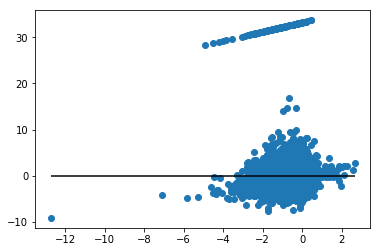

In [108]:
print(model.score(X_test, y_test))

# Plot Residuals
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

0.022579952746847987


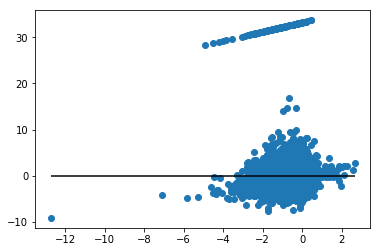

In [109]:
print(model.score(X_test, y_test))

# Plot Residuals
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [110]:
#Scale the independent variables

# from sklearn.preprocessing import StandardScaler
#piped_dropped = piped.dropna()
#piped_y = piped_dropped['target']
#piped_all = piped_dropped.drop(columns=['Unnamed: 0','first_active_month', 'card_id'])
#piped_X = piped_all.drop(columns=['target'])
# all_std = StandardScaler().fit_transform(train_c)
# all_std_df = pd.DataFrame(all_std, columns=train_cl.columns.values)
# y_std = all_std_df['target']
# X_std = all_std_df.drop(columns=['target'])

In [111]:
#Split train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Run linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 13.20612968515565
R-squared (R2 ): 0.022579952746847987
